# 주제 : 우리 아이 학습 성공/실패 요소
----------

    
## 데이터 소개
    
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

---

# 데이터 불러오기

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [172]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('xAPI-Edu-Data.csv')

# EDA 및 데이터 기초 통계 분석


## 기초 통계 분석

In [173]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [175]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


## 수치형 데이터


In [176]:
df.head(2)
# raisedhands, VisITedResources, AnnouncementsView, Discussion

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


### raisehands

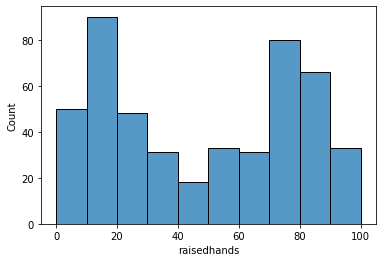

In [177]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='raisedhands', data=df);

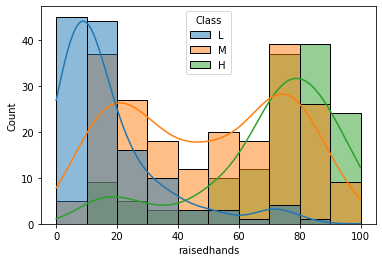

In [178]:
sns.histplot(x='raisedhands', hue='Class', data=df, hue_order=['L','M','H'], kde=True); # hue_order : legend의 순서 바꾸기

- 손을 적게 든 학생들은 성적이 매우 낮고, 손을 많이 든 학생들은 성적이 매우 높게 분포되어 있은 것을 알 수 있다.
- 대신, 중간 성적인 애들은 손을 든 횟수로는 알기 어렵다.

### VisITedResources

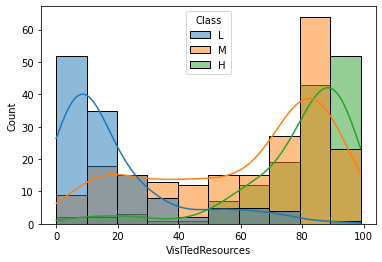

In [179]:
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L','M','H'], kde=True);

- 성적이 낮은 학생들은 대체적으로 수업 자료를 적게 확인했다.
- 그러나, 성적이 중위권 혹은 상위권인 학생들은 대체적으로 수업 자료를 많이 확인했다.

### AnnouncementsView

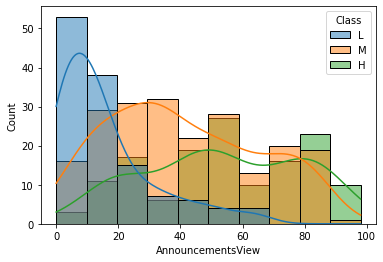

In [180]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L','M','H'], kde=True);

- 하위권 학생들은 일반적인 공지에 대체적으로 관심이 없다.
- 중위권, 상위권 학생들 또한 수업 외적의 공지들은 관심이 그렇게 많지는 않다. -> 일반 공지 확인과 성적은 큰 연관성이 없을 수도 있다.

### Discussion

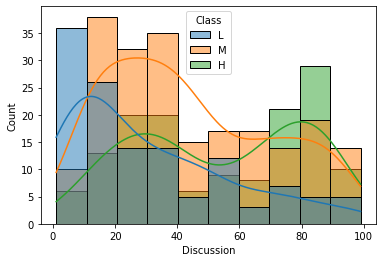

In [181]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L','M','H'], kde=True);

- 하위권 학생들은 다른 거에 비해 discussion 참여율은 상대적으로 높다.
- 중위권 학생들도 참여를 많이 안하는 학생이 많다.
- 상위권 학생들은 쌍봉으로 많이 하는 학생, 안하는 학생으로 분류되어 있다.

### raisehands & VisITedResources

- raisehands와 VisITedResources가 성적에 큰 영향을 주는 만큼, 두개의 jointplot도 살펴보자

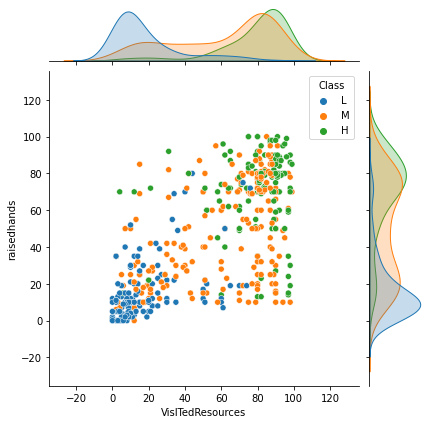

In [182]:
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L','M','H']);

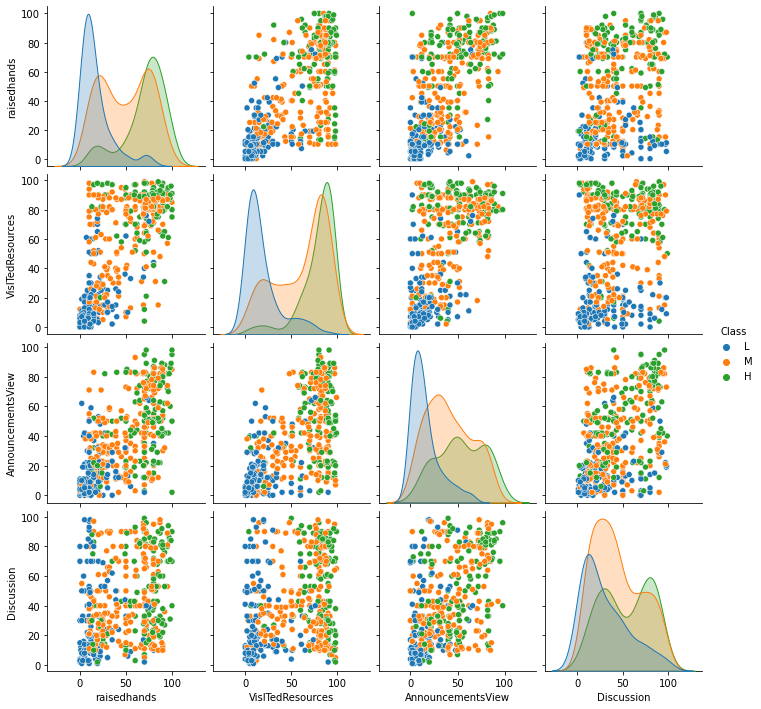

In [183]:
sns.pairplot(df, hue='Class', hue_order=['L','M', 'H']);

- visted와 raisehands를 살펴보면, 네모로 펼쳐져있다. => 두개의 상관성이 낮다 => 상관성이 낮으면서 데이터가 갈라져 있으면, 데이터가 다른축에서 데이터를 잘 나누어줄수 있다는 것이다. => 두개를 동시에 보는 것이 매우 유용 할 것이다.
- 그러나, Discussion과 raisehand/visited를 보면 비록 네모로 펼쳐져있지만, 일자로 갈라져 있는 것을 볼 수 있다. 이는 raisehands와 visited의 영향으로 class가 갈라졌다는 것을 알 수 있다.
- Feature 끼리는 서로 Correlation이 낮으면 좋고, feature와 target의 Correlation이 높으면 좋다.

## 범주형 데이터

In [184]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

### Class

In [185]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


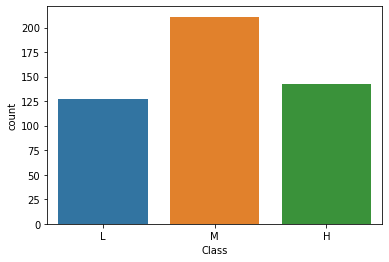

In [186]:
sns.countplot('Class', data=df, order=['L','M','H']);

### gender

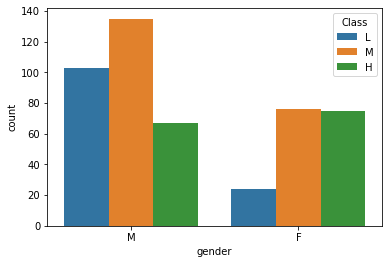

In [187]:
sns.countplot('gender', data=df, hue='Class', hue_order=['L','M','H']);

- 남학생 수가 대체적으로 더 많다.
- 여학생의 수는 적지만, 상대적으로 남학생보다 성적이 좋은 학생들이 더 많다.

### NationalITy

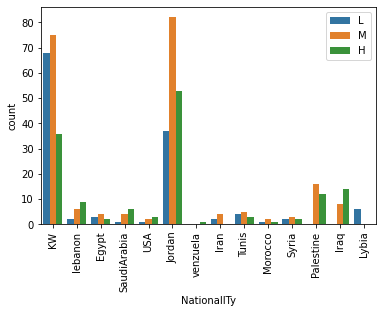

In [188]:
sns.countplot('NationalITy', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- 쿠웨이트에 대체적으로 성적이 낮은 학생이 많다.
- 미국, 요르단, 팔레스타인,이라크등 성적이 높은 학생이 많다.

### Topic

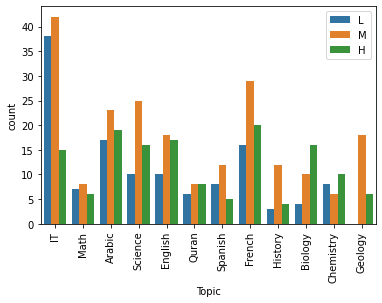

In [189]:
sns.countplot('Topic', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- IT,Math, Spanish, Chemistry등의 수업들이 성적이 다소 높지 않고 많이 갈린다. => 어려운 과목
- Science, English, French, History등의 수업들은 성적이 높은 학생들이 많다.

### Relation

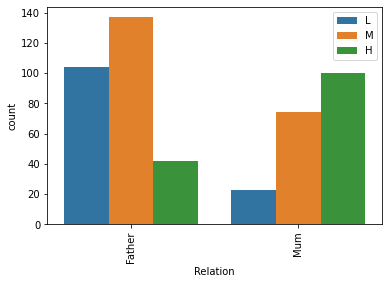

In [190]:
sns.countplot('Relation', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- 주 보호자가 아버지일 경우 학생들의 성적은 대체적으로 낮고
- 어머니일 경우 대체적으로 높다 
<br> => 어머니가 아버지들보다 학생들의 성적에 관심이 많다.

### ParentAnsweringSurvey

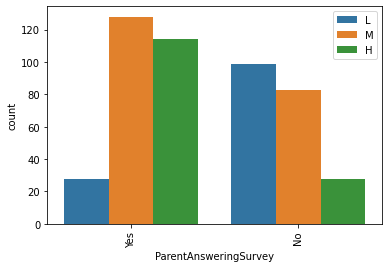

In [191]:
sns.countplot('ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- 설문조사에 응한 부모들의 자녀들 성적이 높은 경우가 많다. => 아이들의 성적에 관심이 많을 가능성이 크다.

### ParentschoolSatisfaction

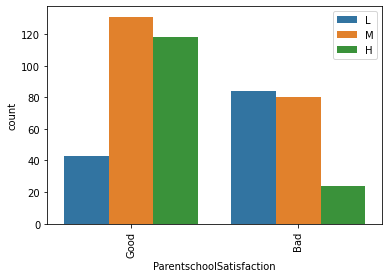

In [192]:
sns.countplot('ParentschoolSatisfaction', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- 만족을 하는 부모들 자녀들의 성적이 좋다.
- 여기서는 주의해야할점은, 성적이 좋아서 만족을 하는지, 아니면 그전부터 만족을 하는지 전후 사실관계를 잘 따져봐야 한다. 
- 만약 성적 발표 이후 좋은거라면, 이런 피쳐는 빼야한다.

### StudentAbsenceDays

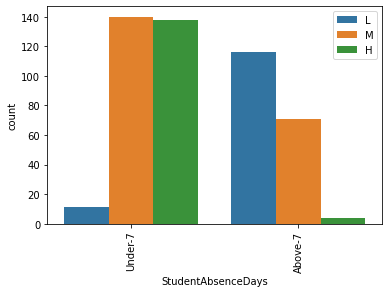

In [193]:
sns.countplot('StudentAbsenceDays', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- 출석에 따른 성적 차이는 매우 극심하다.

## 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [194]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

In [195]:
df['Class_value'] = df['Class'].map({'L':-1, 'M':0, 'H':1})
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1


In [196]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기

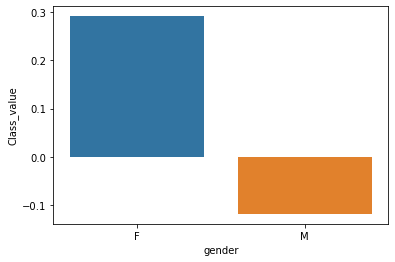

In [197]:
# gender
gb = df.groupby(['gender'])['Class_value'].mean()
sns.barplot(gb.index, gb)
plt.show()

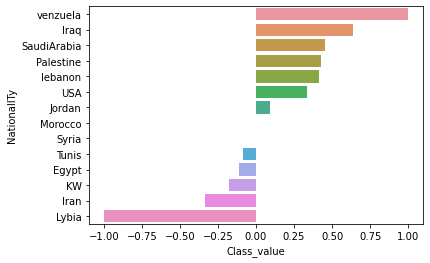

In [198]:
# NationalITy
gb = df.groupby(['NationalITy'])['Class_value'].mean().sort_values(ascending=False)
sns.barplot(y=gb.index, x=gb)
plt.show()

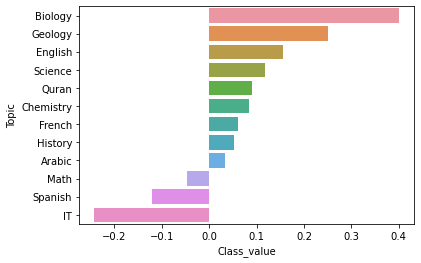

In [199]:
# Topic
gb = df.groupby(['Topic'])['Class_value'].mean().sort_values(ascending=False)
sns.barplot(y=gb.index, x=gb)
plt.show()

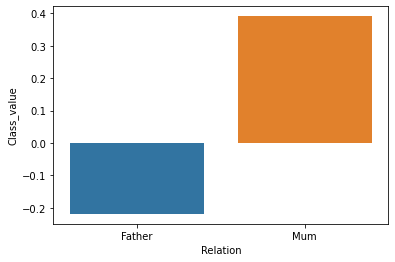

In [200]:
# Relation
gb = df.groupby(['Relation'])['Class_value'].mean()
sns.barplot(gb.index, gb)
plt.show()

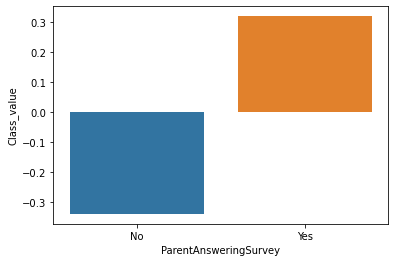

In [201]:
# ParentAnsweringSurvey
gb = df.groupby(['ParentAnsweringSurvey'])['Class_value'].mean()
sns.barplot(gb.index, gb)
plt.show()

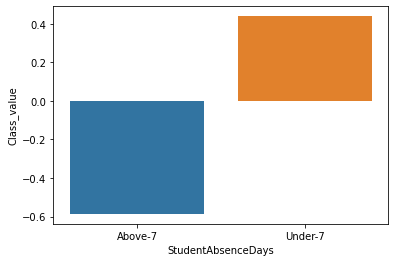

In [202]:
# StudentAbsenceDays
gb = df.groupby(['StudentAbsenceDays'])['Class_value'].mean()
sns.barplot(gb.index, gb)
plt.show()

## 모델 학습을 위한 데이터 전처리


### get_dummies()를 이용하여 범주형 데이터 전처리하기


In [203]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0


In [204]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [205]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['Class','Class_value','ParentschoolSatisfaction'], axis=1), 
                  columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                            'SectionID', 'Topic', 'Semester', 'Relation','StudentAbsenceDays', 'ParentAnsweringSurvey'],
                    drop_first=True)
y = df['Class']

In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y=le.transform(y)

In [207]:
label_y = pd.DataFrame({'Class':df['Class'], 'Label':y})
label_y.drop_duplicates(subset=['Class'], keep='first', inplace=True)
label_y

,Class,Label
0,M,2
2,L,1
10,H,0


### 학습데이터와 테스트데이터 분리하기


In [208]:
from sklearn.model_selection import train_test_split

In [209]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##  Classification 모델 학습하기


### Logistic Regression 모델 생성/학습하기


In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### 모델 학습 결과 평가하기


In [212]:
from sklearn.metrics import classification_report

In [213]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65        40
           1       0.82      0.79      0.81        34
           2       0.71      0.57      0.63        70

    accuracy                           0.68       144
   macro avg       0.70      0.71      0.70       144
weighted avg       0.70      0.68      0.68       144



### XGBoost 모델 생성/학습하기


In [214]:
from xgboost import XGBClassifier

In [223]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier(random_state=1)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

### 문제 13. 모델 학습 결과 평가하기


In [224]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        48
           1       0.85      0.85      0.85        33
           2       0.73      0.65      0.69        63

    accuracy                           0.74       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.75      0.74      0.74       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [217]:
# Logistic Regression 모델의 coef_ 속성을 plot하기

In [218]:
label_y

,Class,Label
0,M,2
2,L,1
10,H,0


In [219]:
model_lr.coef_.shape  #3개의 class, 59개의 feature

(3, 59)

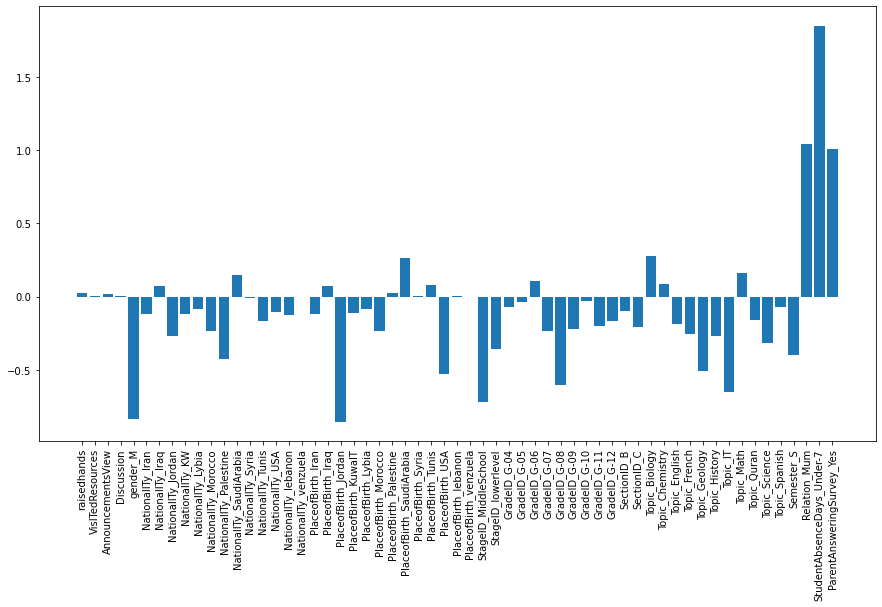

In [220]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[0, :])  # class H의 상관성이 높은 feature
plt.xticks(rotation=90)
plt.show()

- 높은 성적과 상관성이 높은 feature
- ParentsAnsweringSurvey_Yes, StudentsAbsenceDayes_Under7, Relation_Mum 등이 있다

반대로 성적이 안 좋을 때 상관성이 높은 것들

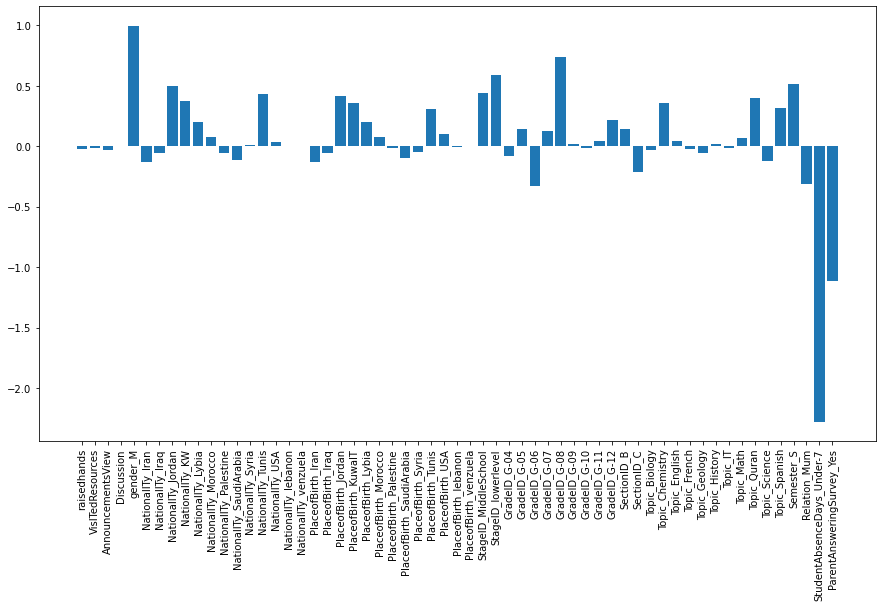

In [221]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[1, :])
plt.xticks(rotation=90)
plt.show()

### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

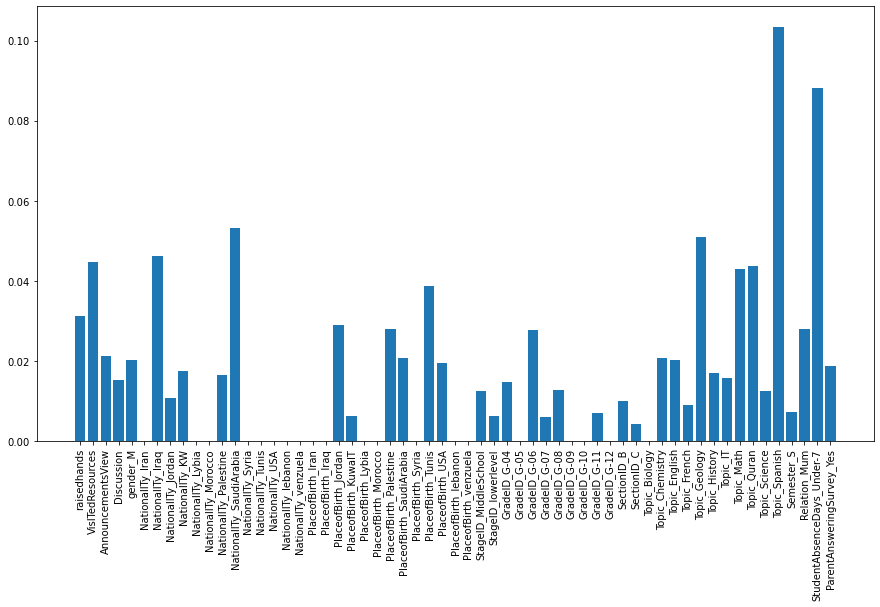

In [225]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()